In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

In [3]:
rdrive = '/mnt/researchdrive/BOX_INTERNAL/opotowsky/'
mll_gam = rdrive + 'mll/gam_spec/'
mll_nuc = rdrive + 'mll/nuc_conc/'
learn_gam = rdrive + 'scikit/gam_spec/'
learn_nuc = rdrive + 'scikit/nuc_conc/'

In [4]:
job = 'Job0_unc0.05'#'Job1_unc0.0'
d1mll113 = pd.read_csv(mll_gam + 'd1_n113/' + job + '/' + job + '.csv').drop(columns=['Unnamed: 0', 'Unnamed: 0.1'])
job = 'Job1_unc0.0'
d1mll31 = pd.read_csv(mll_gam + 'd1_n31/' + job + '/' + job + '.csv').drop(columns=['Unnamed: 0', 'Unnamed: 0.1'])
d1mll_auto = pd.read_csv(mll_gam + 'd1_auto/' + job + '/' + job + '.csv').drop(columns=['Unnamed: 0', 'Unnamed: 0.1'])

In [11]:
learn_path = learn_gam
knncsv = 'burnup_knn_tset1.0_d1_hpge_mimic_mll.csv'
dtrcsv = 'burnup_dtree_tset1.0_d1_hpge_mimic_mll.csv'
knn_auto = pd.read_csv(learn_path + 'auto/' + knncsv).drop(columns='Unnamed: 0')
dtr_auto = pd.read_csv(learn_path + 'auto/' + dtrcsv).drop(columns='Unnamed: 0')
knn31 = pd.read_csv(learn_path + 'n31/' + knncsv).drop(columns='Unnamed: 0')
dtr31 = pd.read_csv(learn_path + 'n31/' + dtrcsv).drop(columns='Unnamed: 0')
knn113 = pd.read_csv(learn_path + 'n113/' + knncsv).drop(columns='Unnamed: 0')
dtr113 = pd.read_csv(learn_path + 'n113/' + dtrcsv).drop(columns='Unnamed: 0')

In [77]:
algs = ['MLL', 'kNN', 'Dec Tree']
en_lists = ['Auto', '31', '113']
def plotme(df_list, xcol, ycol, errcol, a):
    n = len(df_list)
    fig, axs = plt.subplots(nrows=1, ncols=n, sharex=True, sharey=True, figsize=(6*n,5))
    for i, (ax, df) in enumerate(zip(axs, df_list)):
        x = df[xcol]
        y = df[ycol]
        ax.scatter(x, y, c=df[errcol], cmap = 'viridis_r')
        ax.plot([x.min(), x.max()], [x.min(), x.max()], 'k--', lw=4)
        ax.set_title(en_lists[i]+' Energy Windows')
        ax.set_xlabel('TrueY')
    axs[0].set_ylabel('PredictedY')
    fig.suptitle(algs[a] + ' Burnup Predictions')
    plt.show()

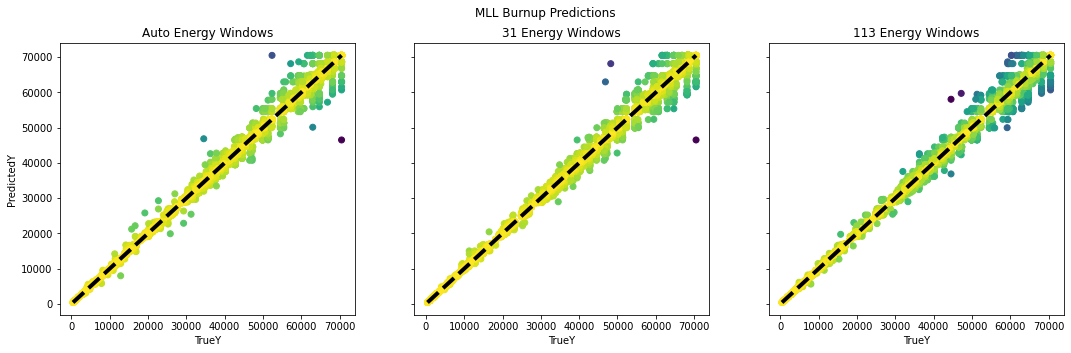

In [78]:
x = 'Burnup'
y = 'pred_Burnup'
err = 'Burnup_Error'
dflist = [d1mll_auto, d1mll31, d1mll113]
plotme(dflist, x, y, err, 0)

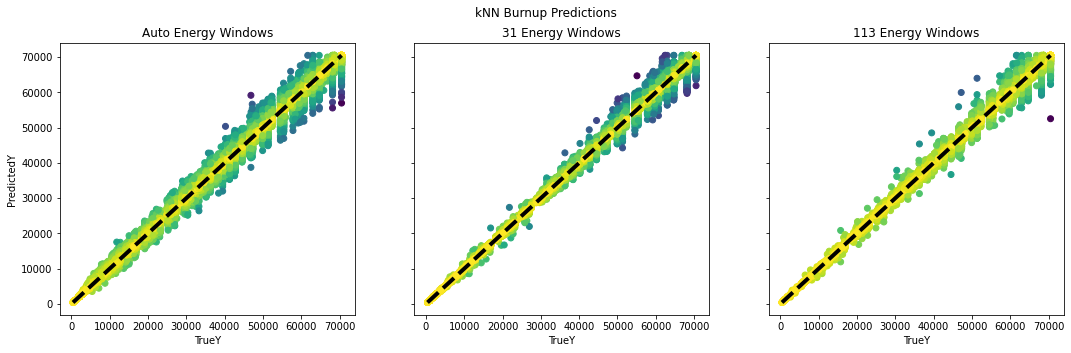

In [79]:
x = 'TrueY'
y = 'kNN'
err = 'AbsError'
dflist = [knn_auto, knn31, knn113]
plotme(dflist, x, y, err, 1)

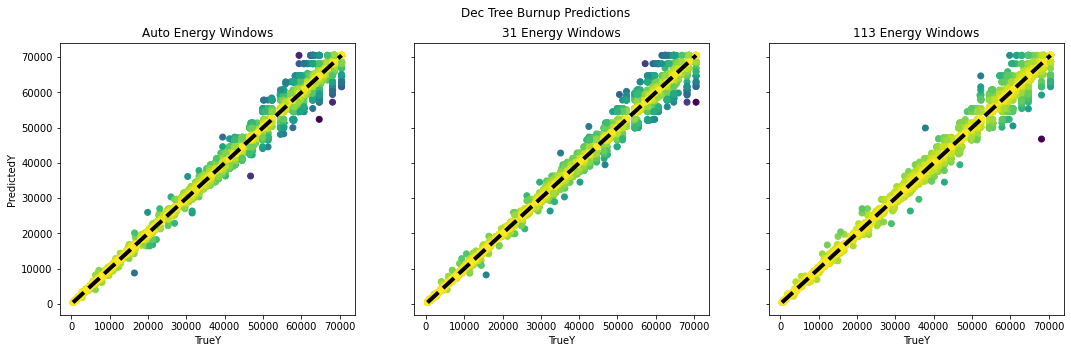

In [80]:
x = 'TrueY'
y = 'DTree'
err = 'AbsError'
dflist = [dtr_auto, dtr31, dtr113]
plotme(dflist, x, y, err, 2)